<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

#1.Data csv 파일 로드하기
#데이터 경로 /content/drive/My Drive/Colab Notebooks/data.csv
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data.csv"#구글 드라이브에서 마운트한 데이터파일 경로
data = np.genfromtxt(path, delimiter = ',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize = (8,8))
plt.scatter(x_data, y_data, c = 'k', alpha = 0.3)
plt.show() 


In [62]:
# Building the model
m = 0
b = 0

L = 0.001  # The learning Rate
num_iterations = 10000  # The number of iterations to perform gradient descent

n = float(len(x_data)) # Number of elements in X

# Performing Gradient Descent 
for i in range(num_iterations): 
    Y_pred = m * x_data + b  # The current predicted value of Y
    D_m = (-2/n) * sum(x_data * (y_data - Y_pred))  #  m 변화값
    D_c = (-2/n) * sum(y_data - Y_pred)  # c 변화값
    m = m - L * D_m  # m 업데이트
    b = b - L * D_b  #  c 업데이트
    
print (m, b)

9.934635538315428 24.90739323511591


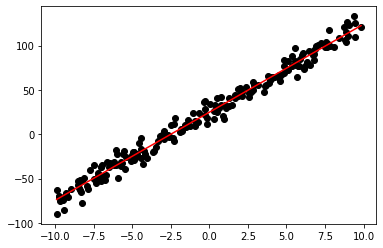

In [64]:
# 예측함수 구현
Y_pred = m * x_data + c

plt.scatter(x_data, y_data, c = 'k') 
plt.plot([min(x_data), max(x_data)], [min(Y_pred), max(Y_pred)], color='r')  # 일차원 회귀함수
plt.show()

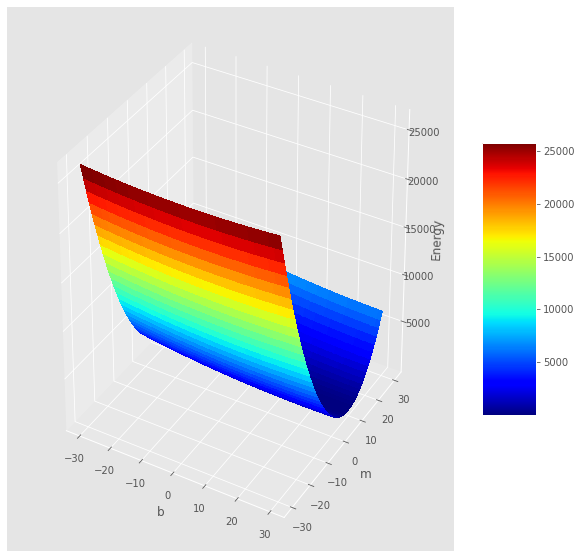

In [79]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# m,b 둘 다  -30 ~ 30의 범위를 가진다.

b = m = np.arange(-30, 30, 0.1)

# m, b 결합
plt_b, plt_m = np.meshgrid(b, m)

# cost function 함수 작성
def calculate_mse(b, m):
    y_hat = b + m * x_data
    error = y_hat - y_data
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(x_data))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_b, plt_m).reshape(len(plt_b), len(plt_m))

fig = plt.figure(figsize=(10, 10)) 
ax = fig.gca(projection='3d')

surf = ax.plot_surface(plt_b,
                       plt_m,
                       mse,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'b')
ax.set_ylabel(r'm')
ax.set_zlabel(r'Energy')
fig.colorbar(surf, shrink= 0.5, aspect= 5)
plt.show()